## Few-shot prompting
- Model provided with examples (question-answer pairs)
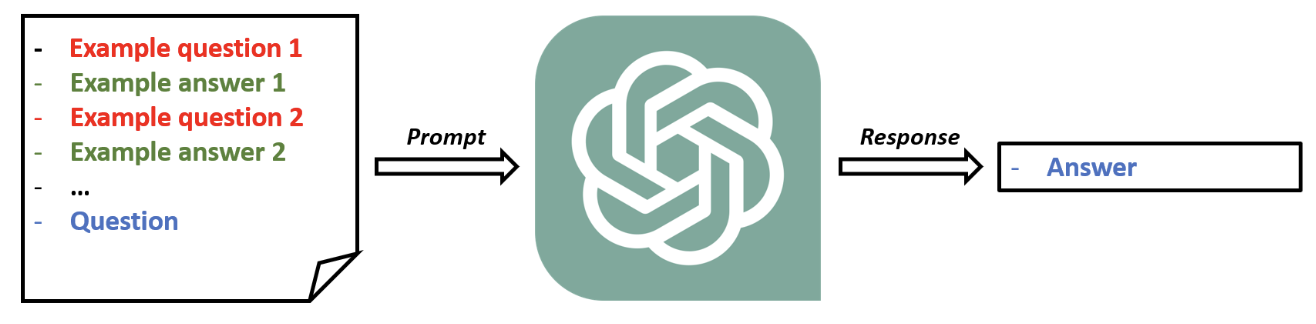

Number of examples:
- Zero -> zero-shot prompting
- One -> one-shot prompting
- More than one -> few-shot prompting

### Zero-shot prompting
- Providing a prompt without examples
- Model generates responses based on its knowledge
- Ideal for quick and uncomplicated tasks

In [ ]:
prompt = "What is prompt engineering?"
print(get_response(prompt))

### One-shot prompting
- Provide the model a single example
- Useful for consistent formatting or style

In [ ]:
prompt =  """ Q: Sum the numbers 3, 5, and 6. A: 3+5+6=14
              Q: Sum the numbers 2, 4, and 7. A: """

print(get_response(prompt))

### Few-shot prompting
- Provide more than one example
- Powerful for contextual tasks

In [ ]:
prompt = """Text: Today the weather is fantastic -> Classification: positive
    Text: The furniture is small -> Classification: neutral
    Text: I don't like your attitude -> Classification: negative
    Text: That shot selection was awful -> Classification: """

print(get_response(prompt))

### Few-shot prompting with a chat model

In [ ]:
response = client.chat.completions.create(  
    model = "gpt-3.5-turbo",
    messages = [{"role": "user","content": "Today the weather is fantastic"},    
                {"role": "assistant","content": "positive"},           
                {"role": "user","content": "I don't like your attitude"},    
                {"role": "assistant","content": "negative"},            
                {"role": "user","content": "That shot selection was awful"}    
               ],  
    temperature = 0
)

print(response.choices[0].message.content)

### Considerations
- Choose number of shots according to task complexity
- Fewer shots -> basic tasks
- Diverse shots -> complex tasks

In [ ]:
# Practice 1

client = OpenAI(api_key="<OPENAI_API_TOKEN>")

# Create a one-shot prompt
prompt = """Extract the odd numbers from the set:
            1. {1, 3, 7, 12, 19} A: {1, 3, 7, 19}
            2. {3, 5, 11, 12, 16} B: """

response = get_response(prompt)
print(response)

In [ ]:
# Practice 2

client = OpenAI(api_key="<OPENAI_API_TOKEN>")

response = client.chat.completions.create(
  model="gpt-4o-mini",
  messages=[
      # Provide the examples as previous conversations
      {"role": "user", "content": "The product quality exceeded my expectations"},
      {"role": "assistant", "content": "1"},
      {"role": "user", "content": "I had a terrible experience with this product's customer service"},
      {"role": "assistant", "content": "-1"},
      # Provide the text for the model to classify
      {"role": "user", "content": "The price of the product is really fair given its features"}
  ],
  temperature=0
)

print(response.choices[0].message.content)

### Multi-step prompting
- Break down an end goal into series of steps
- Model goes through each step to give final output
- Multi-step prompts are used for:
   - Sequential tasks
   - Cognitive tasks

### Single-step prompt: writing a blog

In [ ]:
prompt = "Compose a travel blog"
print(get_response(prompt))

### Multi-step prompt: writing a blog post

In [ ]:
prompt = """Compose a travel blog as follows:
Step 1: Introduce the destination.
Step 2: Share personal adventures during the trip.
Step 3: Summarize the journey."""

print(get_response(prompt))

In [ ]:
# Practice 3

client = OpenAI(api_key="<OPENAI_API_TOKEN>")

# Create a single-step prompt to get help planning the vacation
prompt = "Help me plan a beach vacation"

response = get_response(prompt)
print(response)

In [ ]:
# Practice 4

client = OpenAI(api_key="<OPENAI_API_TOKEN>")

# Create a prompt detailing steps to plan the trip
prompt = """Help me plan a detailed beach vacation, which includes the following:
    1. Four potential locations
    2. Each with some accommodation options
    3. Some activities
    4. Evaluation of the pros and cons"""

response = get_response(prompt)
print(response)

In [ ]:
# Practice 5

client = OpenAI(api_key="<OPENAI_API_TOKEN>")

code = '''
def calculate_rectangle_area(length, width):
    area = length * width
    return area
'''

# Create a prompt that analyzes correctness of the code
prompt = f"""Assess the function provided in the delimited '''{code}''' string accordingly to the three criteria:
1. Correct syntax
2. Receiving two inputs
3. Returning one output"""

response = get_response(prompt)
print(response)

## Chain-of-thought and self-consistency prompting

### Chain-of-thought prompting
- Requires LLMs to provide reasoning steps (thoughts) before giving answer
- Used for complex reasoning tasks
- Help reduce model errors

### STANDARD PROMPTING TO SOLVE A REASONING TASK

In [ ]:
prompt = """Q: You start with 15 books in your collection. At the bookstore, you purchase 8 new books. 
Then, you lend 3 to your friend and 2 to your cousin. Later, you visit another bookstore and buy 5 more books. 
How many books do you have now? A: The answer is"""

print(get_response(prompt))

In [ ]:
prompt = """Q: You start with 15 books in your collection. At the bookstore, you purchase 8 new books. 
Then, you lend 3 to your friend and 2 to your cousin. Later, you visit another bookstore and buy 5 more books. 
How many books do you have now? A: Let's think step by step"""

print(get_response(prompt))

### Chain-of-thought prompting with few-shots

In [ ]:
example = """Q: The odd numbers in this group add up to an even number:  9, 10, 13, 4, 2.
A: Adding all the odd numbers (9, 13) gives 22. The answer is True."""

question = """Q: The odd numbers in this group add up to an even number: 15, 13, 82, 7. A:"""

prompt = example + question
print(get_response(prompt))

### Chain-of-thought versus multi-step prompting
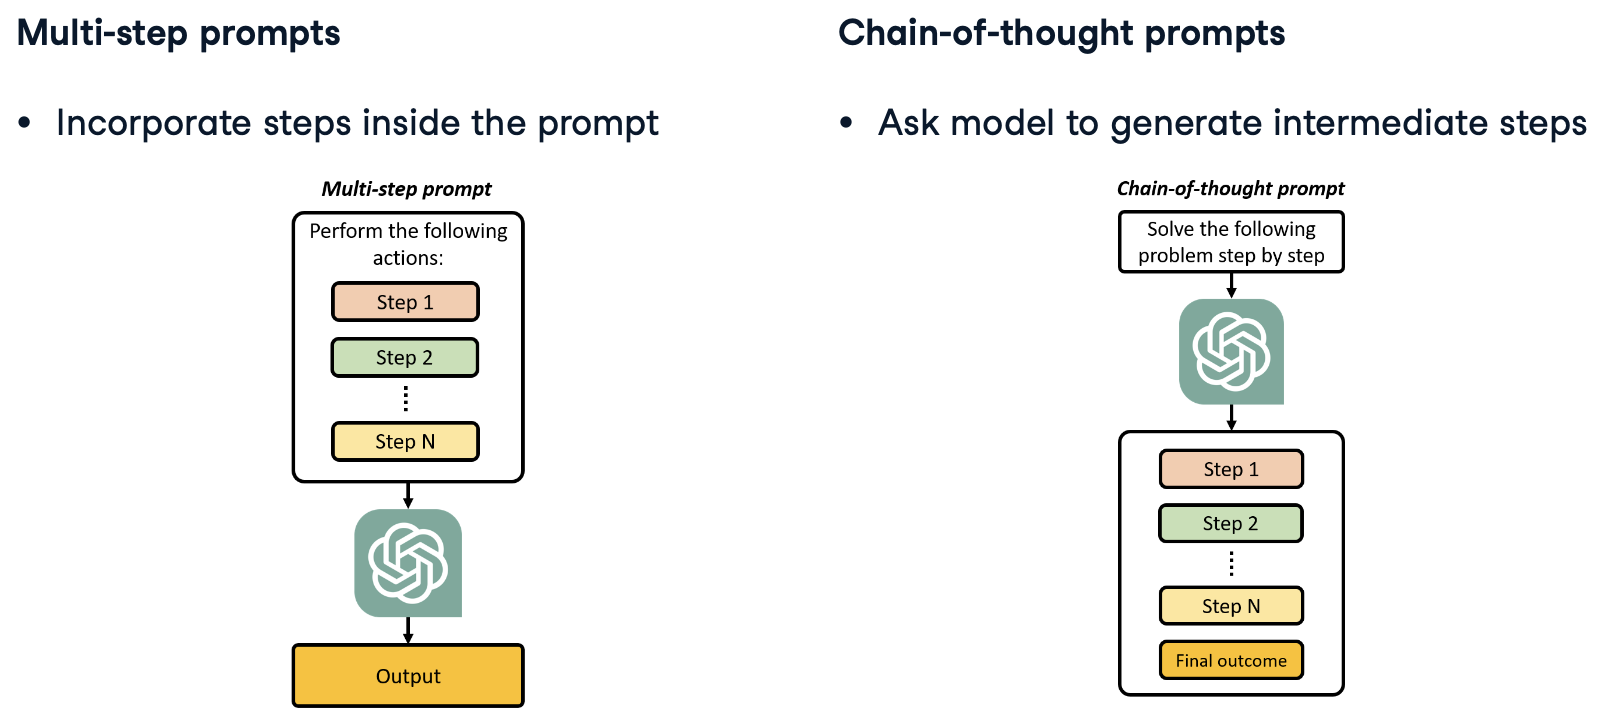

### Self-consistency prompting
- Generates multiple chain-of-thoughts by prompting the model several times
- Majority vote to obtain final output
- Can be done by defining **multiple prompts** or a **prompt generating multiple** responses.

In [ ]:
self_consistency_instruction = '''Imagine three completely independent experts who reason differently are answering this question.
The final answer is obtained by majority vote. The question is: "problem_to_solve = "If there are 10 cars in the parking lot and 
3 more cars arrive. Half the original number of cars leave. Then, half of the current number of cars arrive. How many cars are there 
in the parking?'''

prompt = self_consistency_instruction + problem_to_solve
print(get_response(prompt))

In [ ]:
# Practice 6

client = OpenAI(api_key="<OPENAI_API_TOKEN>")

# Create the chain-of-thought prompt
prompt = '''Q: Determine my friend's father's age in 10 years, given that he is currently twice your friend's age,
    and your friend is 20. A: Let's think about it step-by-step'''

response = get_response(prompt)
print(response)

In [ ]:
# Practice 7

client = OpenAI(api_key="<OPENAI_API_TOKEN>")

# Define the example 
example = """Q: Sum the even numbers in the following set: {9, 10, 13, 4, 2}.
             A: Even numbers: {2, 4, 10}. Adding them: 2 + 4 + 10 = 16"""

# Define the question
question = """Q: determine and sum the even numbers on the following set: {15, 13, 82, 7, 14}
              A:"""

# Create the final prompt
prompt = f"""Based on the example and question which were delimited by triple backticks,
    answer the question similar to how the example has been formatted. Let's think about it step-by-step '''{example}''' '''{question}'''"""

response = get_response(prompt)
print(response)

In [ ]:
# Practice 8

client = OpenAI(api_key="<OPENAI_API_TOKEN>")

# Create the self-consistency instruction
self_consistency_instruction = (
    "Solve the following problem as if you are three different experts. "
    "Each expert should reason step by step independently and provide a final numeric answer. "
    "After all three experts provide their answers, combine the results using a majority vote "
    "to decide the final answer. Clearly state the final answer after the majority vote."
)

# Create the problem to solve
problem_to_solve = (
    "If you own a store that sells laptops and mobile phones. "
    "You start your day with 50 devices in the store, out of which 60% are mobile phones. "
    "Throughout the day, three clients visited the store, each of them bought one mobile phone, "
    "and one of them bought additionally a laptop. "
    "Also, you added to your collection 10 laptops and 5 mobile phones. "
    "How many laptops and mobile phones do you have by the end of the day?"
)

# Create the final prompt
prompt = self_consistency_instruction + "\n\n" + problem_to_solve

response = get_response(prompt)
print(response)

### Iterative prompt engineering
- No prompt can be perfect at the beginning
- Prompt Engineering is an iterative process where we:
  - Build a prompt
  - Feed it to the model
  - Observe and analyze the output
  - Reiterate to make the prompt better

### Refining prompts

In [ ]:
# Initial prompt

prompt = "Generate an Excel sheet containingfive student names and their grades"
print(get_response(prompt))

In [ ]:
# Refined prompt

prompt = "Generate a table that I can copy to Excel, containing five student names and their grades"
print(get_response(prompt))

In [ ]:
# Example: analyzing a python function

code = '''def calculate_rectangle_area(length, width): 
    area = length * width    
    return area'''

prompt = f"""  Analyze the code delimited by triple backticks with one sentence  
    ```{code}```."""

print(get_response(prompt))

In [ ]:
# Prompt refinement

prompt = f"""  Analyze the code delimited by triple backticks and provide its programming  
    language with one sentence   ```{code}```."""

print(get_response(prompt))

In [ ]:
prompt = f"""  For the function delimited by triple backticks, provide in a structured format the following: 
    - description: one sentence short description 
    - language: the programming language used
    - input: the inputs to the function 
    - output: the output returned by the function  ```{code}```."""

print(get_response(prompt))

### Few-shot prompt refinement
- Weather description classification

In [ ]:
# Initial prompt

prompt = """Clear skies and a gentle breeze. -> Sunny
    Heavy rain and thunderstorms expected. -> Rainy
    Fresh snowfall with freezing temperatures. -> """

print(get_response(prompt))

In [ ]:
# Refined prompt

prompt = """Clear skies and a gentle breeze. -> Sunny
Heavy rain and thunderstorms expected. -> Rainy
The political climate in the country was stormy -> Unknown
The wind of change brought a refreshing breeze to the company's operations. -> """

print(get_response(prompt))

### Prompt refinement for various prompt types
- Few-shot prompts: refine examples
- Multi-step prompts: refine guiding steps
- Chain-of-thought and self-consistency prompts: refine problem description#

In [ ]:
# Practice 9

client = OpenAI(api_key="<OPENAI_API_TOKEN>")

# Refine the following prompt
prompt = "Generate a table with three columns for the top ten pre-trained language models, listing the model name, release year, and owning company."

response = get_response(prompt)
print(response)

In [ ]:
# Practice 10

client = OpenAI(api_key="<OPENAI_API_TOKEN>")

# Refine the following prompt
prompt = """
Receiving a promotion at work made me feel on top of the world -> Happiness
The movie's ending left me with a heavy feeling in my chest -> Sadness
Walking alone in the dark alley sent shivers down my spine -> Fear
They sat and ate their meal -> no explicit emotion
"""

response = get_response(prompt)
print(response)